In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def use_gpu():
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() 
                                                         else torch.FloatTensor)
use_gpu()

In [3]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = len(test_loader.dataset)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Average loss: {:.3f}, Test Acc: {:.3f} ({}/{})'.format(test_loss, 100.*correct/total, correct, total))


In [4]:
batch_size = 64
test_batch_size = 1000
epochs = 10
criterion = nn.CrossEntropyLoss()

trainset = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
testset = datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size=test_batch_size, shuffle=True)

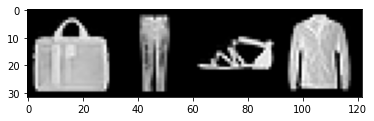

Bag Trouser Sandal Coat


In [5]:
classes = ('T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle Boot')

def imshow(image):
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image,(1,2,0)))
    plt.show()

images,labels = next(iter(train_loader))
imshow(utils.make_grid(images[0:4]))
print(' '.join(classes[labels[j]] for j in range(4)))

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense_layers = nn.Sequential(
                     nn.Flatten(),
                     nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 10)
        )

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        out = self.dense_layers(x)
        return out

model = MLP()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1, Loss: 0.373
Average loss: 0.000, Test Acc: 84.380 (8438/10000)
Train Epoch: 2, Loss: 0.338
Average loss: 0.000, Test Acc: 85.530 (8553/10000)
Train Epoch: 3, Loss: 0.357
Average loss: 0.000, Test Acc: 86.500 (8650/10000)
Train Epoch: 4, Loss: 0.127
Average loss: 0.000, Test Acc: 86.430 (8643/10000)
Train Epoch: 5, Loss: 0.289
Average loss: 0.000, Test Acc: 87.150 (8715/10000)
Train Epoch: 6, Loss: 0.181
Average loss: 0.000, Test Acc: 87.360 (8736/10000)
Train Epoch: 7, Loss: 0.158
Average loss: 0.000, Test Acc: 88.150 (8815/10000)
Train Epoch: 8, Loss: 0.380
Average loss: 0.000, Test Acc: 88.320 (8832/10000)
Train Epoch: 9, Loss: 0.328
Average loss: 0.000, Test Acc: 88.140 (8814/10000)
Train Epoch: 10, Loss: 0.268
Average loss: 0.000, Test Acc: 88.240 (8824/10000)


In [9]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(8, 8))
        self.conv_2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=(4, 4))
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(9*9*16, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        if torch.cuda.is_available():
            x = x.to(device="cuda")
        x = F.relu(self.conv_1(x))
        x = F.relu(self.conv_2(x))
        x = F.max_pool2d(x, 2)
        x = self.flatten(x)
        x = F.relu(self.fc(x))
        out = self.fc2(x)
        return out

model = CNN()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)


Train Epoch: 1, Loss: 0.581
Average loss: 0.000, Test Acc: 82.110 (8211/10000)
Train Epoch: 2, Loss: 0.792
Average loss: 0.000, Test Acc: 86.280 (8628/10000)
Train Epoch: 3, Loss: 0.404
Average loss: 0.000, Test Acc: 87.800 (8780/10000)
Train Epoch: 4, Loss: 0.620
Average loss: 0.000, Test Acc: 88.160 (8816/10000)
Train Epoch: 5, Loss: 0.147
Average loss: 0.000, Test Acc: 89.280 (8928/10000)
Train Epoch: 6, Loss: 0.231
Average loss: 0.000, Test Acc: 89.270 (8927/10000)
Train Epoch: 7, Loss: 0.338
Average loss: 0.000, Test Acc: 88.980 (8898/10000)
Train Epoch: 8, Loss: 0.197
Average loss: 0.000, Test Acc: 89.280 (8928/10000)
Train Epoch: 9, Loss: 0.112
Average loss: 0.000, Test Acc: 89.650 (8965/10000)
Train Epoch: 10, Loss: 0.178
Average loss: 0.000, Test Acc: 89.960 (8996/10000)
